In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


### The matplotlib object-oriented API

The main idea with object-oriented programming is to have objects that one can apply functions and actions on

In [2]:
x = np.linspace(0, 5, 10)
y = x ** 2

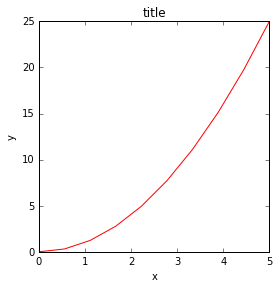

In [3]:
fig = plt.figure(figsize=(4,4))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Although a little bit more code is involved, the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

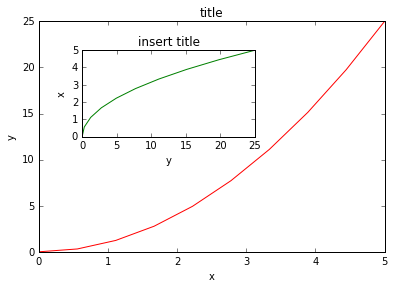

In [4]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');


If we don't care about being explicit about where our plot axes are placed in the figure canvas, then we can use one of the many axis layout managers in matplotlib. Subplots creates common layouts ofsubplots, including the enclosing figure object, in a single call.

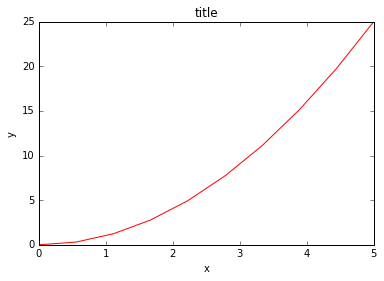

In [5]:

fig, axes = plt.subplots()

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');


## Loop through axes

(<matplotlib.figure.Figure at 0x7f98a0e3f550>,
 array([[<matplotlib.axes._subplots.PolarAxesSubplot object at 0x7f98a2713da0>,
         <matplotlib.axes._subplots.PolarAxesSubplot object at 0x7f98a0d8d710>]], dtype=object))

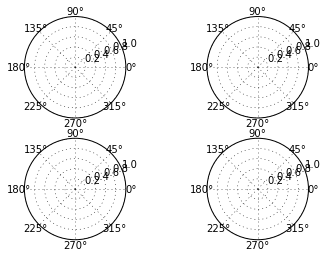

In [13]:
# Four polar axes
plt.subplots(2, 2, subplot_kw=dict(polar=True))

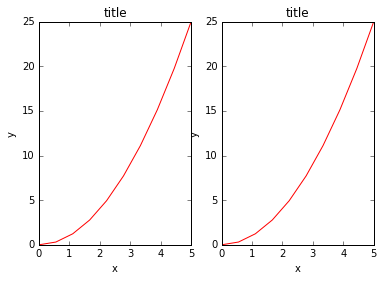

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

## Figure size, aspect ratio and DPI¶


Matplotlib allows the aspect ratio, DPI and figure size to be specified when the Figure object is created, using the figsize and dpi keyword arguments. figsize is a tuple of the width and height of the figure in inches, and dpi is the dots-per-inch (pixel per inch). To create an 800x400 pixel, 100 dots-per-inch figure, we can do:

In [8]:
fig = plt.figure(figsize=(8,4), dpi=100)


The same arguments can also be passed to layout managers, such as the subplots function:

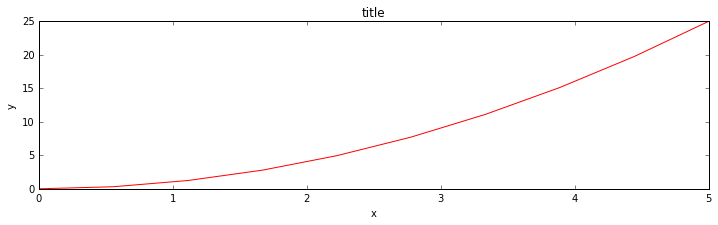

In [9]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

## Saving figures¶
To save a figure to a file we can use the savefig method in the Figure class:

In [10]:
fig.savefig("filename.png")
#Here we can also optionally specify the DPI and choose between different output formats:
fig.savefig("filename.png", dpi=200)


## Legends, labels and titles
Now that we have covered the basics of how to create a figure canvas and add axes instances to the canvas, let's look at how decorate a figure with titles, axis labels, and legends.


Figure titles

A title can be added to each axis instance in a figure. To set the title, use the set_title method in the axes instance: `ax.set_title("title");`

Axis labels

Similarly, with the methods set_xlabel and set_ylabel, we can set the labels of the X and Y axes:`ax.set_xlabel("x")`


Legends

Easiest to use the `label="label text"` keyword argument when plots or other objects are added to the figure, and then using the legend method without arguments to add the legend to the figure:

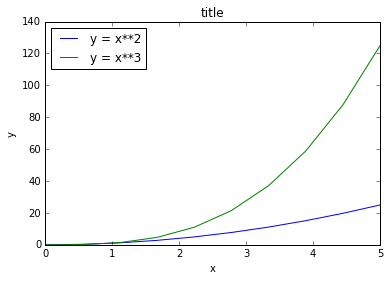

In [14]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc=2); # upper left corner
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');

## Setting colors, linewidths, linetypes,and marker styles

Colors

With matplotlib, we can define the colors of lines and other graphical elements in a number of ways.

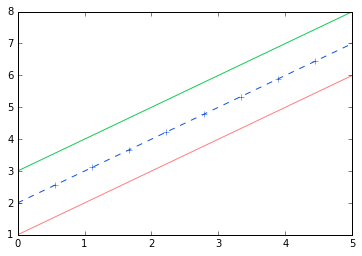

In [16]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
ax.plot(x, x+2, color="#1155dd", ls='--', marker='+')        # RGB hex code for a bluish color
ax.plot(x, x+3, color="#15cc55")        # RGB hex code for a greenish color

In [17]:
## Imshow - arrays and rasters

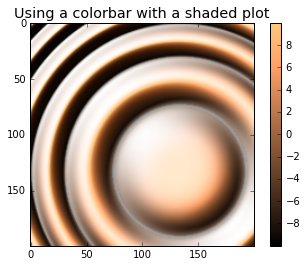

In [7]:
from matplotlib.colors import LightSource

"""Display a correct numeric colorbar for a shaded plot."""
y, x = np.mgrid[-4:2:200j, -4:2:200j]
z = 10 * np.cos(x**2 + y**2)

cmap = plt.cm.copper
ls = LightSource(315, 45)
rgb = ls.shade(z, cmap)

fig, ax = plt.subplots()
ax.imshow(rgb)

# Use a proxy artist for the colorbar...
im = ax.imshow(z, cmap=cmap)
im.remove()
fig.colorbar(im)

ax.set_title('Using a colorbar with a shaded plot', size='x-large')